# CSC 74020 Machine Learning
# Week 7

# Image Classifier with Neural Network

Adapted from [TensorFlow tutorial](https://www.tensorflow.org/tutorials/quickstart/beginner)

0. Represent imagae data as numbers for use in a neural network -> pixels
1. Build a neural network that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

**Big thank you to Professor Liang Zhao for much of the material in this workbook**

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" width="600">

In [1]:
# import tensorflow
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

2.13.0


In [2]:
# Load and prepare the MNIST dataset.
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert the data from integers to floating-point numbers
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape, x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [3]:
type(x_train)

numpy.ndarray

In [4]:
(28*28+1)*128+(128+1)*10

101770

In [6]:
# Build a neural network model by stacking layers.
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [7]:
#number of parameters
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# For each example the model returns a vector of "logits", one for each class.
index = 1234
predictions = model(x_train[index:(index+1)]).numpy()
print(predictions)

[[-0.615  1.146 -0.167 -0.348 -0.532  0.312 -0.292 -0.284  0.671  0.01 ]]


In [9]:
# The tf.nn.softmax function converts these logits to probabilities for each class
probs = tf.nn.softmax(predictions).numpy()
print(probs)

[[0.046 0.27  0.073 0.061 0.05  0.117 0.064 0.065 0.168 0.087]]


In [10]:
# The model makes prediction based on the largest probability
class_prediction = np.argmax(probs)
print(class_prediction)

1


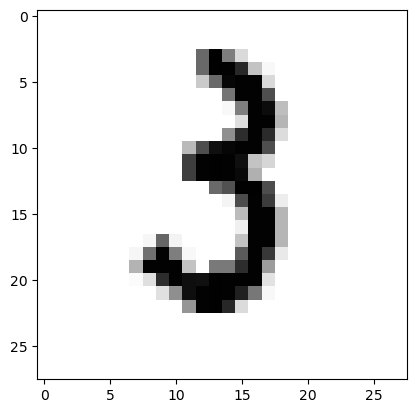

In [11]:
# Visualize this image
plt.imshow(x_train[index].reshape([28, 28]), cmap=plt.cm.binary)

In [12]:
# The prediction accuracy is low, since no training has been performed yet.
# Let's introduce a function that measures the prediction error.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

loss_fn(y_train[index:(index+1)], predictions).numpy()

2.8035803

In [13]:
# Set up the training environment
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [14]:
# The Model.fit method adjusts the model parameters to minimize the loss
model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=100)

Epoch 1/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2588 - accuracy: 0.9268 - val_loss: 0.1446 - val_accuracy: 0.9569
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1134 - accuracy: 0.9661 - val_loss: 0.1018 - val_accuracy: 0.9699
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0774 - accuracy: 0.9765 - val_loss: 0.0786 - val_accuracy: 0.9753
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0580 - accuracy: 0.9822 - val_loss: 0.0821 - val_accuracy: 0.9757
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0456 - accuracy: 0.9853 - val_loss: 0.0721 - val_accuracy: 0.9785
Epoch 6/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0351 - accuracy: 0.9891 - val_loss: 0.0759 - val_accuracy: 0.9774
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0292 - accuracy: 0.9911 - val_loss: 0.0788 - val_a

In [15]:
# The above loss and accuracy is for the training data. Let's evaluate the model on the test set.
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 850us/step - loss: 0.2592 - accuracy: 0.9772


[0.25924161076545715, 0.9771999716758728]

In [16]:
# The image classifier is not trained to ~98% accuracy on this dataset.
# Let's create a test case ourselves.
# I use MS Paint to draw a digit. Remember to resize the canvas to 28*28 pixels

# from google.colab import files
# files.upload()

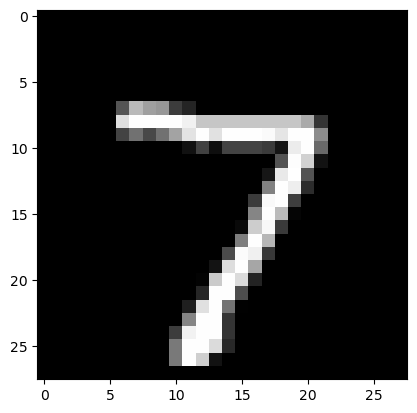

In [17]:
plt.imshow(x_test[0], cmap='gray')
plt.show()

In [18]:
# import image using pillow
import PIL
#img = PIL.Image.open('826852359.jpg')
img = x_test[0]#img.convert('1') # convert image to black and white
print(img.size)

784


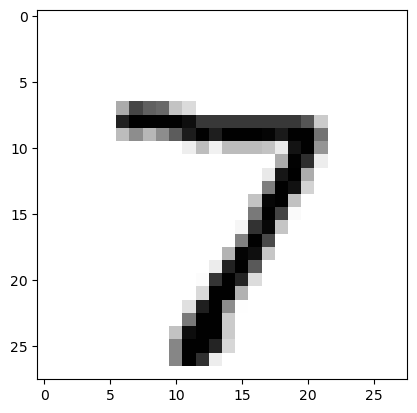

In [19]:
# Convert white pixel to 0 and black pixel to 1
img_np = 1 - np.asarray(img).astype(float)
plt.imshow(img_np, cmap='gray')

In [20]:
# Apply the neural network model
predictions = model(img.reshape([-1, 28, 28])).numpy()
probs = tf.nn.softmax(predictions).numpy()
class_prediction = np.argmax(probs)
print(class_prediction)

7


In [21]:
# Display probability
probs

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [22]:
# Apply the neural network model
predictions = model(img_np.reshape([-1, 28, 28])).numpy()
probs = tf.nn.softmax(predictions).numpy()
class_prediction = np.argmax(probs)
print(class_prediction)

7


# Description of the forward and backward propagation process

## Notations
- Input vector $x = (X_1, X_2, ..., X_m)\in\mathbb{R}^{m}$
- Response vector $y = (Y_1, Y_2, ..., Y_n)\in\mathbb{R}^{n}$
- Sigmoid function $\sigma(z) = 1 / (1 + e^{-z})$
- Layer index:
    - Input layer: 0
    - First hidden layer: 1
    - Second hidden layer: 2
    - ...
    - Output layer: L
- Layer $i$: (superscipt does not represent power)
    - Layer input: $z^i$
    - Weight matrix: $w^i$
    - Bias vector: $b^i$
    - Layer output: $a^i \in\mathbb{R}^{h_i}$
- Model output: $a^L$
- We use $y(x)$ and $a^L(x)$ to represent the desired output and the model output for a given vector $x$.


## Forward Propagation with Single Input

- Input layer: $a^0 \leftarrow x$
- Hidden layer 1:
    - $z^1 \leftarrow w^1\cdot a^0 + b^1$
    - $a^1 \leftarrow \sigma(z^1)$
- (General formula) Layer $l = 1, ..., L$:
    - $z^l \leftarrow w^l\cdot a^{l-1} + b^l$
    - $a^l \leftarrow \sigma(z^l)$
- Output: $a^L$

## Forward Propagation with Batch Input

Usually we need to feed the model with a batch of inputs for efficiency. Let $X$ represent a horizontal sequence of input vectors.

- Input layer: $a^0 \leftarrow X$

What is the size of:
- $w^l$:
- $b^l$:
- $z^l$:
- $a^l$:


## Backward Propagation with Batch Input

Let's use the MSE function to measure the error:
$$C = \sum_{x\in X}\|y(x) - a^L(x)\|^2$$

In order to update the parameters, we need to calculate the partial derivative of each parameter. The back-propagation algorithm suggests the following procedure:

- $\frac{\partial C}{\partial a^L}$
- $\frac{\partial C}{\partial z^L}$
- $\frac{\partial C}{\partial w^L}$, $\frac{\partial C}{\partial b^L}$, $\frac{\partial C}{\partial a^{L-1}}$
- (more generally) for $l = L, L-1, ..., 1$, calculate
    - $\frac{\partial C}{\partial a^l}$
    - $\frac{\partial C}{\partial z^L}$
    - $\frac{\partial C}{\partial w^l}$
    - $\frac{\partial C}{\partial b^l}$